In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
filename=r'C:\Users\User\Desktop\narcotics internship\US3.csv'
dataset = pd.read_csv(filename)

In [3]:
dataset.shape


(128790, 9)

In [4]:
dataset.head()

,Year,Population,Type,NonUSBorn,EducationCount,CommuteCount,Income,GDP,Unemployment
0,2011,186717.0,Heroin,5147,15094,81.4,67770,5016735,9.0
1,2011,186717.0,Heroin,5147,15094,81.4,67770,478277,9.0
2,2011,186717.0,Heroin,5147,15094,12.9,67770,5016735,9.0
3,2011,186717.0,Heroin,5147,15094,12.9,67770,478277,9.0
4,2011,186717.0,Heroin,5147,15094,0.9,67770,5016735,9.0


In [5]:
missing_data=['Year','Population','NonUSBorn','EducationCount','CommuteCount','Income','GDP','Unemployment']
for column in missing_data:
    dataset[column]=dataset[column].replace(0,np.NaN)
    mean=int(dataset[column].mean(skipna=True))
    dataset[column]=dataset[column].replace(np.NaN,mean)

In [6]:
df = pd.DataFrame(dataset,columns=['Year','Population','Type','NonUSBorn','EducationCount','CommuteCount','Income','GDP','Unemployment'])
print (df)

        Year  Population       Type  NonUSBorn  EducationCount  CommuteCount  \
0       2011    186717.0     Heroin     5147.0         15094.0          81.4   
1       2011    186717.0     Heroin     5147.0         15094.0          81.4   
2       2011    186717.0     Heroin     5147.0         15094.0          12.9   
3       2011    186717.0     Heroin     5147.0         15094.0          12.9   
4       2011    186717.0     Heroin     5147.0         15094.0           0.9   
...      ...         ...        ...        ...             ...           ...   
128785  2017     97638.0  Methadone     3855.0         19545.0           4.0   
128786  2017     97638.0  Methadone     3855.0         19545.0           4.0   
128787  2017     97638.0  Methadone     3855.0          7853.0          75.6   
128788  2017     97638.0  Methadone     3855.0          7853.0          75.6   
128789  2017     97638.0  Methadone     3855.0          7853.0          17.1   

         Income        GDP  Unemploymen

In [7]:
corrMatrix = df.corr()
print (corrMatrix)

                    Year  Population  NonUSBorn  EducationCount  CommuteCount  \
Year            1.000000    0.006122   0.014611        0.012059      0.001208   
Population      0.006122    1.000000   0.912650        0.923086     -0.007852   
NonUSBorn       0.014611    0.912650   1.000000        0.863807     -0.005614   
EducationCount  0.012059    0.923086   0.863807        1.000000     -0.007326   
CommuteCount    0.001208   -0.007852  -0.005614       -0.007326      1.000000   
Income          0.137005    0.244888   0.214381        0.233491     -0.003725   
GDP             0.016508    0.644783   0.596961        0.600857     -0.005475   
Unemployment   -0.731289   -0.006297   0.010469       -0.010328     -0.001342   

                  Income       GDP  Unemployment  
Year            0.137005  0.016508     -0.731289  
Population      0.244888  0.644783     -0.006297  
NonUSBorn       0.214381  0.596961      0.010469  
EducationCount  0.233491  0.600857     -0.010328  
CommuteCount   

In [8]:
import seaborn as sn

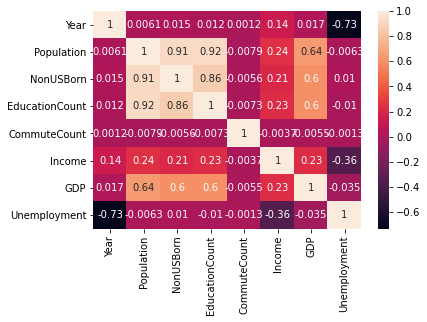

In [9]:
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [10]:
X = dataset.drop('Type', axis=1)
y = dataset['Type']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5)

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(X_train)
X_train = scaling.transform(X_train)
X_test = scaling.transform(X_test)

In [25]:
from sklearn.svm import SVC
#svclassifier = SVC(kernel='linear')
#svclassifier = SVC(kernel='poly', degree=8)
svclassifier = SVC(kernel='sigmoid')
svclassifier.fit(X_train, y_train)


  

SVC(kernel='sigmoid')

In [26]:
y_pred = svclassifier.predict(X_test)


In [27]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 4325  4873]
 [ 4823 50374]]
              precision    recall  f1-score   support

      Heroin       0.47      0.47      0.47      9198
   Methadone       0.91      0.91      0.91     55197

    accuracy                           0.85     64395
   macro avg       0.69      0.69      0.69     64395
weighted avg       0.85      0.85      0.85     64395

